In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import pickle

In [172]:
df = pd.read_csv("../dataset/Flight_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [173]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [174]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [175]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [176]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [177]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [178]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [179]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [180]:
df["duration"].min()

0.83

In [181]:
df["duration"].max()

49.83

In [182]:
df["duration"].median()

11.25

In [183]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [184]:
# Store unique values for each categorical column for later use
categories = {
    'airline': df.airline.unique().tolist(),
    'source_city': df.source_city.unique().tolist(),
    'destination_city': df.destination_city.unique().tolist(),
    'arrival_time': df.arrival_time.unique().tolist(),
    'departure_time': df.departure_time.unique().tolist(),
    'stops': df.stops.unique().tolist()
}

# Save categories
with open('categories.pkl', 'wb') as f:
    pickle.dump(categories, f)

## Data preprocessing


In [185]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("flight", axis=1, inplace=True)

df["class"] = df["class"].apply(lambda x: 1 if x == "Business" else 0)

In [186]:
df.stops = pd.factorize(df.stops)[0]

In [187]:
df = df.join(pd.get_dummies(df.airline, prefix="airline").astype(int)).drop(
    "airline", axis=1
)
df = df.join(pd.get_dummies(df.source_city, prefix="source").astype(int)).drop(
    "source_city", axis=1
)
df = df.join(pd.get_dummies(df.destination_city, prefix="dest").astype(int)).drop(
    "destination_city", axis=1
)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival").astype(int)).drop(
    "arrival_time", axis=1
)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure").astype(int)).drop(
    "departure_time", axis=1
)

In [188]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [189]:
# Removing Outliers
from scipy import stats

z_scores = stats.zscore(df['price'])
df = df[abs(z_scores) < 3]

## Training regression model


In [190]:
X, y = df.drop("price", axis=1), df.price

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
rf = RandomForestRegressor(n_jobs=-1, max_depth=30)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_jobs=-1)

In [193]:
y_pred = rf.predict(X_test)

print("R2:", rf.score(X_test, y_test))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9871033080807494
MAE: 1010.9625849254224
RMSE: 2543.3858523522103


Text(0, 0.5, 'Predicted Flight Price')

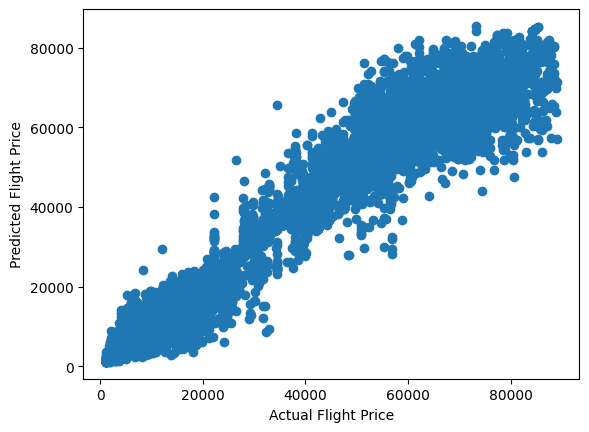

In [194]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")

In [195]:
importances = dict(zip(rf.feature_names_in_, rf.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8845023638096251),
 ('duration', 0.05680744407813319),
 ('days_left', 0.017240273929091363),
 ('airline_Vistara', 0.004899189394991718),
 ('airline_Air_India', 0.004437921325809589),
 ('source_Delhi', 0.003240299955012513),
 ('dest_Delhi', 0.002930897723001497),
 ('dest_Mumbai', 0.0023059033290484224),
 ('source_Mumbai', 0.0017694783878053418),
 ('dest_Hyderabad', 0.0016204432891020746),
 ('source_Kolkata', 0.001601558753793336),
 ('dest_Kolkata', 0.0015301270698421122),
 ('source_Hyderabad', 0.0014869917862571952),
 ('stops', 0.0014111346878934534),
 ('source_Bangalore', 0.0013431938292284688),
 ('arrival_Evening', 0.0013162565717555294),
 ('departure_Evening', 0.0011357463525473825),
 ('arrival_Night', 0.001075373866224243),
 ('dest_Bangalore', 0.0010648191683268078),
 ('arrival_Afternoon', 0.0010368026955493318),
 ('source_Chennai', 0.000933630107424418),
 ('dest_Chennai', 0.0008546804919353247),
 ('departure_Morning', 0.0008196965483894627),
 ('departure_Early_Morning'

<BarContainer object of 10 artists>

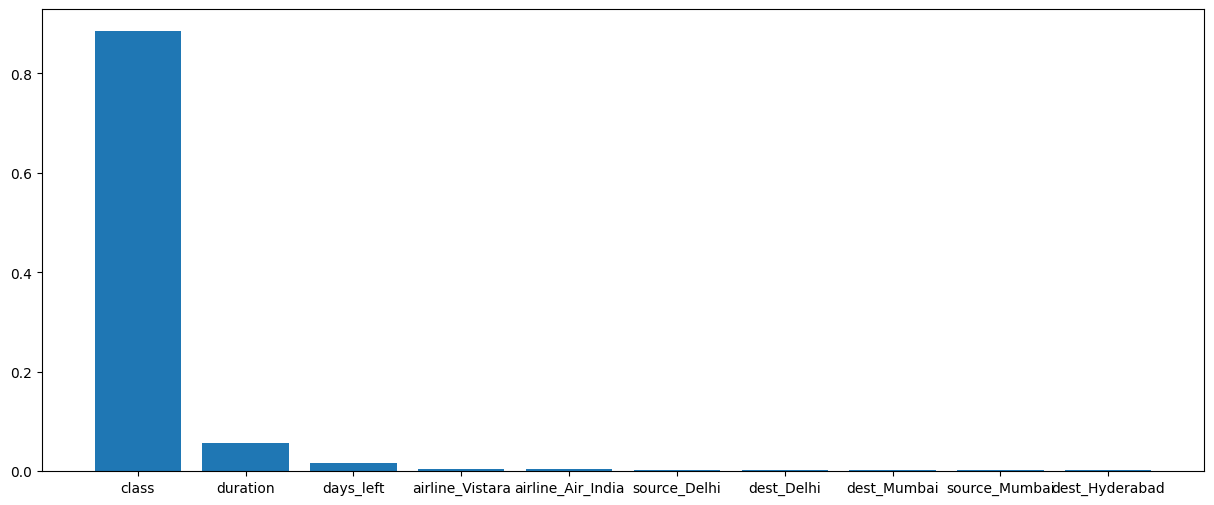

In [196]:
plt.figure(figsize=(15, 6))
plt.bar(
    [x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]]
)

In [197]:
# Save feature names
feature_names = X.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

In [198]:
# Save model
with open('flight_model.pkl', 'wb') as f:
    pickle.dump(rf, f)